# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>


* Credit card default prediction is a crucial aspect of the financial industry, particularly for banks and credit card issuers.
* By accurately predicting which customers are likely to default on their credit card payments, financial institutions can mitigate risk, reduce losses, and maintain financial stability. This process involves analyzing historical data, such as payment history, credit scores, income levels, and spending patterns, to identify trends and factors that contribute to default risk.
* Effective prediction models enable lenders to make informed decisions regarding credit approval, limit setting, and interest rates, ultimately leading to improved customer management, optimized portfolio performance, and enhanced profitability.

# <font color='navy'>Step 2 Data Collection:</font>

* We get the data from UCI ML directory.
* Of course in real life, you will use SQL, access to databases at work, write SQL querries to obtain the data. * You will need to join tables, or even use multiple databases to get the data you need for the problem you aim to solve.

In [ ]:
# Use the Python package installer pip to install the ucimlrepo package
!pip install ucimlrepo

In [ ]:
### WE WILL GET THE DATA DIRECTLY FROM UCIML

# Import the fetch_ucirepo function from the ucimlrepo package
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from the UCI Machine Learning Repository using its ID
combined_cycle_power_plant = fetch_ucirepo(id=350)

# Extract the features (independent variables) from the dataset as a pandas DataFrame
X = combined_cycle_power_plant.data.features

# Extract the targets (dependent variables) from the dataset as a pandas DataFrame
y = combined_cycle_power_plant.data.targets

# Note: The data is also provided on our LMS (Learning Management System) in case you prefer to use that source.

# Feature descriptions:
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
#     X6 = the repayment status in September,
#     X7 = the repayment status in August
#     ...
#     X11 = the repayment status in April,
# The measurement scale for the repayment status is:
#     -1 = pay duly;
#     1 = payment delay for one month;
#     2 = payment delay for two months;
#     ...
#     8 = payment delay for eight months;
#     9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar).
#     X12 = amount of bill statement in September,
#     X13 = amount of bill statement in August,
#     ...
#     X17 = amount of bill statement in April,
# X18-X23: Amount of previous payment (NT dollar).
#     X18 = amount paid in September,
#     X19 = amount paid in August,
#     ...
#     X23 = amount paid in April,


In [ ]:
X.head(2) # display first x records in the dataset x (input)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000


In [ ]:
y.head(2) # display first x records in the dataset y (output)

,Y
0,1
1,1


* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.

* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [ ]:
# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the features DataFrame
for i in X.columns:
    # Check if more than 50% of the values in the column are NaN
    if X[i].isna().sum() / len(X) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the features DataFrame
        X = X.drop(i, axis=1)

# Print the names of the columns that were removed
col_names


[]

In [ ]:
# Train and Test Split

# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Display the first few rows of the training features DataFrame
X_test.head()

# Uncomment the line below to display the first few rows of the training target values DataFrame
y_test.head()


,Y
2308,0
22404,0
23397,0
25058,0
2664,1


# <font color='navy'>Step 3 Data Processing</font>
* This is a simple example. I know that hits dataset is already clean with all numerical variables without any outliers, missing values, or known issues. The dataset is pretty much ready to go.
* But in real life, you will need to do all the steps as outlined in previous modules, particularly in the data preprocessing modeule.
* You will need to extract features (recall the movies dataset where we extracted the cast information, directors, writers)
* You will handle missing values outliers
* You will need to standardize/scale the numerical variables.
* You will convert categorical variables into numerical variables
* If you have text data like feedback comments you will need to process that data to creaste tf-idf/dtm etc.

In [ ]:
# All I will do is to scale the data
# Import the StandardScaler class from scikit-learn's preprocessing module
# I will do this only for numerical variables.
# All dataset apart from the variables below is numerical
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


X_train_c = X_train.copy()
X_train_c = X_train.drop(['X2', 'X3', 'X4'], axis=1)
columns = X_train_c.columns

# Fit the scaler to the training features
scaler.fit(X_train_c)

# Transform the training features using the scaler
X_train_c = scaler.transform(X_train_c)

# Convert the transformed training features back to a DataFrame
X_train_c = pd.DataFrame(X_train_c, columns=columns)


In [ ]:
from sklearn.preprocessing import OneHotEncoder  # Import the OneHotEncoder class from sklearn

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore', drop = 'first')

# Fit the encoder on the categorical variables in the dataframe 'X_train'
enc.fit(X_train[['X2', 'X3', 'X4']])

dummies = pd.DataFrame(enc.transform(X_train[['X2', 'X3', 'X4']]).toarray(),
                       columns=enc.get_feature_names_out())

# Transform the categorical variables in the dataframe 'X_train'



In [ ]:
dummies

,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20095,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20096,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20097,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20098,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train = pd.concat([X_train_c, dummies], axis=1)

X_train.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-0.365093,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,-0.615053,0.935500,-0.636379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.061279,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,0.256331,0.324404,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.597155,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,0.253471,-0.071392,-0.054757,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.287739,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,0.253471,0.961297,1.127461,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.906571,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,-0.017655,0.648791,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


* **Data Balancing**
>* Data balancing is a technique used in machine learning and statistics to address the issue of class imbalance in a dataset. Class imbalance occurs when the number of instances of one class is significantly higher than the number of instances of other classes.
>* This imbalance can lead to biased models that perform poorly on the minority class.

* **Class Imbalance:**

>* Definition: When one class (majority class) significantly outnumbers another class (minority class) in a dataset.
Problem: Machine learning models can become biased towards
>* the majority class, leading to poor performance on the minority class.

* **Why It Matters:**

>* Model Performance: Imbalanced data can result in models with high accuracy but poor performance in predicting the minority class, which can be critical in applications like fraud detection, medical diagnosis, and spam detection.
>* Evaluation Metrics: Standard metrics like accuracy can be misleading. Metrics like precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) are often used to evaluate models on imbalanced datasets.
Balancing Techniques:

* **Resampling:**
>* Oversampling: Increases the number of instances in the minority class by duplicating them or generating synthetic examples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
>* Undersampling: Reduces the number of instances in the majority class by randomly removing some of them.


In [ ]:
y_train.value_counts() # display class levels

,count
Y,
0,15622
1,4478


In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts() # display class levels after balancing

,count
Y,
0,15622
1,15622


# <font color='navy'>Step 4 EDA and Data Visualization:</font>
* This was explained in previous modules. I will not be covering this here. Refer to the modules 3, 4, 5, and 6.

# <font color='navy'>Step 5 Model Building - Logistic Regression Classifier:</font>

In [ ]:
# Import the linear_model module from scikit-learn
from sklearn import linear_model

# Create a logistic regression object
log_reg = linear_model.LogisticRegression()

# Train the logistic regression model using the training data
# The fit method is used to train the logistic regression model with the training features (X_train) and target values (y_train)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Calculate the predicted probabilities for the training data
# The predict_proba method returns an array with probabilities for each class
# For binary classification, the array has two columns: the first column is the probability of the negative class (class 0),
# and the second column is the probability of the positive class (class 1)
pred_train_prob = log_reg.predict_proba(X_train)

pred_train_prob[:, 0] # probability of y variable being zero
#pred_train_prob[:, 1] # probability of y variable being one

array([0.69958203, 0.28657685, 0.51221935, ..., 0.37636943, 0.29388003,
       0.61548063])

In [ ]:
# Calculate the predicted classes for the training data
# The predict method returns the predicted class labels for the given input data
pred_train = log_reg.predict(X_train)  # binary variable using a threshold of 0.5

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_train, columns=['preds'])

# Add the actual target values (y_train) to the predictions DataFrame
predictions['actual'] = y_train.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,0,1
1,1,0
2,0,1
3,1,0
4,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])
cm

array([[10726,  5314],
       [ 4896, 10308]])

In [ ]:
# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.68
Sensitivity: 0.69
Specificity: 0.68
Precision: 0.67


* Making predictions for test set and performance calculation with test set
* The test set must go through same processing pipeline

In [ ]:
# 3. Scaling numerical variables
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_test_c = X_test.copy()
X_test_c = X_test.drop(['X2', 'X3', 'X4'], axis=1)
columns = X_test_c.columns

# Fit the scaler to the training features

X_test_c = scaler.transform(X_test_c)

X_test_c = pd.DataFrame(X_test_c, columns= columns)

dummies = pd.DataFrame(enc.transform(X_test[['X2', 'X3', 'X4']]).toarray(),
                       columns=enc.get_feature_names_out())

# Transform the categorical variables in the dataframe 'X_train'

X_test = pd.concat([X_test_c, dummies], axis=1)

X_test.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-1.061279,-1.137752,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,-0.574559,-0.548602,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.133030,-1.029313,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,1.171699,1.083134,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.751863,-0.378679,0.015441,0.110028,0.141588,0.18989,0.23891,0.253471,0.261999,0.284538,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.287739,1.464785,0.015441,0.110028,0.141588,0.18989,0.23891,-0.615053,-0.413223,-0.423048,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.906571,0.055077,0.015441,0.110028,0.141588,0.18989,0.23891,1.990517,0.591198,-0.018195,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Calculate the predicted classes for the test data
# The predict method returns the predicted class labels for the given input data
pred_test = log_reg.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,1,0
1,0,0
2,1,0
3,1,0
4,0,1


In [ ]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cm = confusion_matrix(predictions['preds'], predictions['actual'])

In [ ]:
# Import necessary module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.68
Sensitivity: 0.66
Specificity: 0.69
Precision: 0.37


# <font color='navy'>Step 5 Model Building - Decision Tree Classifier:</font>

In [ ]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Classifier object
clf_tree = tree.DecisionTreeClassifier()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree classifier using the training data
clf_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = clf_tree.predict(X_train)

# Make predictions on the test data
pred_test = clf_tree.predict(X_test)

# Convert the array of predicted classes into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()

# Calculate the confusion matrix based on the actual and predicted values
cm = confusion_matrix(predictions['actual'], predictions['preds'])

# Calculate accuracy, sensitivity, specificity, and precision from the confusion matrix (cm)
# cm is assumed to be a 2x2 confusion matrix

# Accuracy: Proportion of correctly predicted instances (true positives and true negatives) among all instances
accuracy = (cm[0, 0] + cm[1, 1]) / (cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print("Accuracy: %.2f" % accuracy)

# Sensitivity (Recall or True Positive Rate): Proportion of actual positives that are correctly identified
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity: %.2f" % sensitivity)

# Specificity (True Negative Rate): Proportion of actual negatives that are correctly identified
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
print("Specificity: %.2f" % specificity)

# Precision (Positive Predictive Value): Proportion of predicted positives that are actually positive
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("Precision: %.2f" % precision)


Accuracy: 0.70
Sensitivity: 0.45
Specificity: 0.77
Precision: 0.36


In [ ]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree classifier
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(clf_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Set the index of the DataFrame to the feature names for easier visualization
var_importance.index = var_importance['VARIABLE']

# Display the first few rows of the variable importance DataFrame to verify the feature importances
var_importance.head()


,IMPORTANCE,VARIABLE
VARIABLE,,
X6,0.202070,X6
X1,0.168424,X1
X5,0.063962,X5
X12,0.043004,X12
X18,0.041978,X18


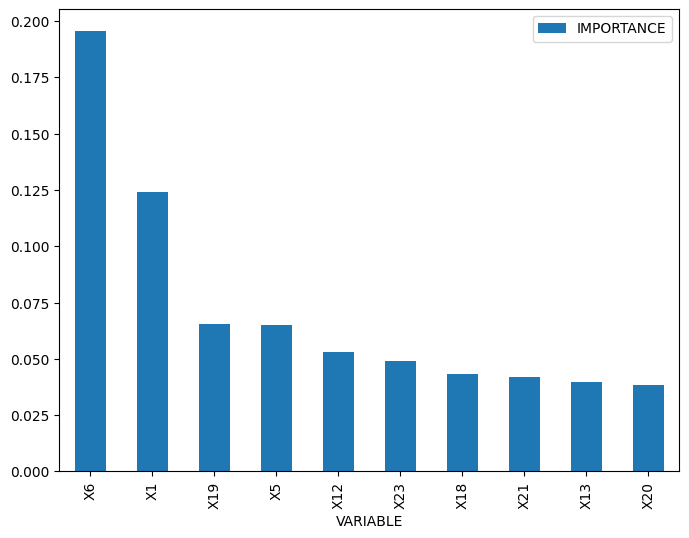

In [ ]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
var_importance[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()
